In [1]:
import torch
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
# Credit to http://softeng.polito.it/erion/ for MoodyLyrics4Q dataset

'''
Çano, Erion; Morisio, Maurizio. Music Mood Dataset Creation Based on Last.fm Tags.
In: Fourth International Conference on Artificial Intelligence and Applications,
    AIAP 2017, Vienna Austria, 27-28 May 2017, pp. 15-26, DOI:10.5121/csit.2017.70603 BibTex
'''

'\nÇano, Erion; Morisio, Maurizio. Music Mood Dataset Creation Based on Last.fm Tags.\nIn: Fourth International Conference on Artificial Intelligence and Applications,\n    AIAP 2017, Vienna Austria, 27-28 May 2017, pp. 15-26, DOI:10.5121/csit.2017.70603 BibTex\n'

[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [ 0  0]
 [ 0  0]
 [ 0 -1]]


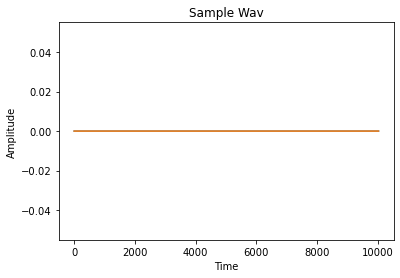

In [2]:

# read audio samples
input_data = read("David Sylvian - September.wav")
audio = input_data[1]
print(audio)
# plot the first 1024 samples
plt.plot(audio[0:10024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave

file = 'David Sylvian - September.wav'

with wave.open(file,'r') as wav_file:
    #Extract Raw Audio from Wav File
    signal = wav_file.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    print(type(len(signal)))
    print(type(signal))
    print(signal[:10000])
    unique, counts = np.unique(signal, return_counts=True)

    print(np.asarray((unique, counts)).T)

    #Split the data into channels 
    channels = [[] for channel in range(wav_file.getnchannels())]
    for index, datum in enumerate(signal):
        channels[index%len(channels)].append(datum)
    print(type(len(channels)))

    #Get time from indices
    fs = wav_file.getframerate()
    print(fs)
    wave.close(file)
    Time=np.linspace(0, len(signal)/len(channels)/fs, num=len(signal)/len(channels))

    #Plot
    plt.figure(1)
    plt.title('Signal Wave...')
    for channel in channels:
        plt.plot(Time,channel)
    plt.show()

<class 'int'>
<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]


d:\csfiles\lambda\git\waveform_sa\venv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.
d:\csfiles\lambda\git\waveform_sa\venv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


[[-31737      1]
 [-31478      1]
 [-30568      2]
 ...
 [ 26105      1]
 [ 26716      1]
 [ 26736      1]]
<class 'int'>
44100


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
import sys
spf = wave.open("David Sylvian - September.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

In [1]:
import pydub 
pydub.AudioSegment.converter = "D:\CSFiles\lambda\git\Waveform_SA\venv\Lib\site-packages\ffmpeg"
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    pydub.AudioSegment.converter = "D:\CSFiles\lambda\git\Waveform_SA\venv\Lib\site-packages\ffmpeg"
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    pydub.AudioSegment.converter = "D:\CSFiles\lambda\git\Waveform_SA\venv\Lib\site-packages\ffmpeg"
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

d:\csfiles\lambda\git\waveform_sa\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
sr, x = read("David_Sylvian_September.mp3")
print(x)

write('out2.mp3', sr, x)

d:\csfiles\lambda\git\waveform_sa\venv\lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified